In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df.info()

df['month'] = df['date'].dt.month
df.head()

print(df['waterfront'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     18702 non-null  int64         
 1   id             18702 non-null  int64         
 2   date           18702 non-null  datetime64[ns]
 3   price          18702 non-null  float64       
 4   bedrooms       18702 non-null  int64         
 5   bathrooms      18702 non-null  float64       
 6   sqft_living    18702 non-null  int64         
 7   sqft_lot       18702 non-null  int64         
 8   floors         18702 non-null  float64       
 9   waterfront     18702 non-null  int64         
 10  view           18702 non-null  int64         
 11  condition      18702 non-null  int64         
 12  grade          18702 non-null  int64         
 13  sqft_above     18702 non-null  int64         
 14  sqft_basement  18702 non-null  int64         
 15  yr_built       1870

In [22]:
print(df['waterfront'].unique())

[0]


<Axes: >

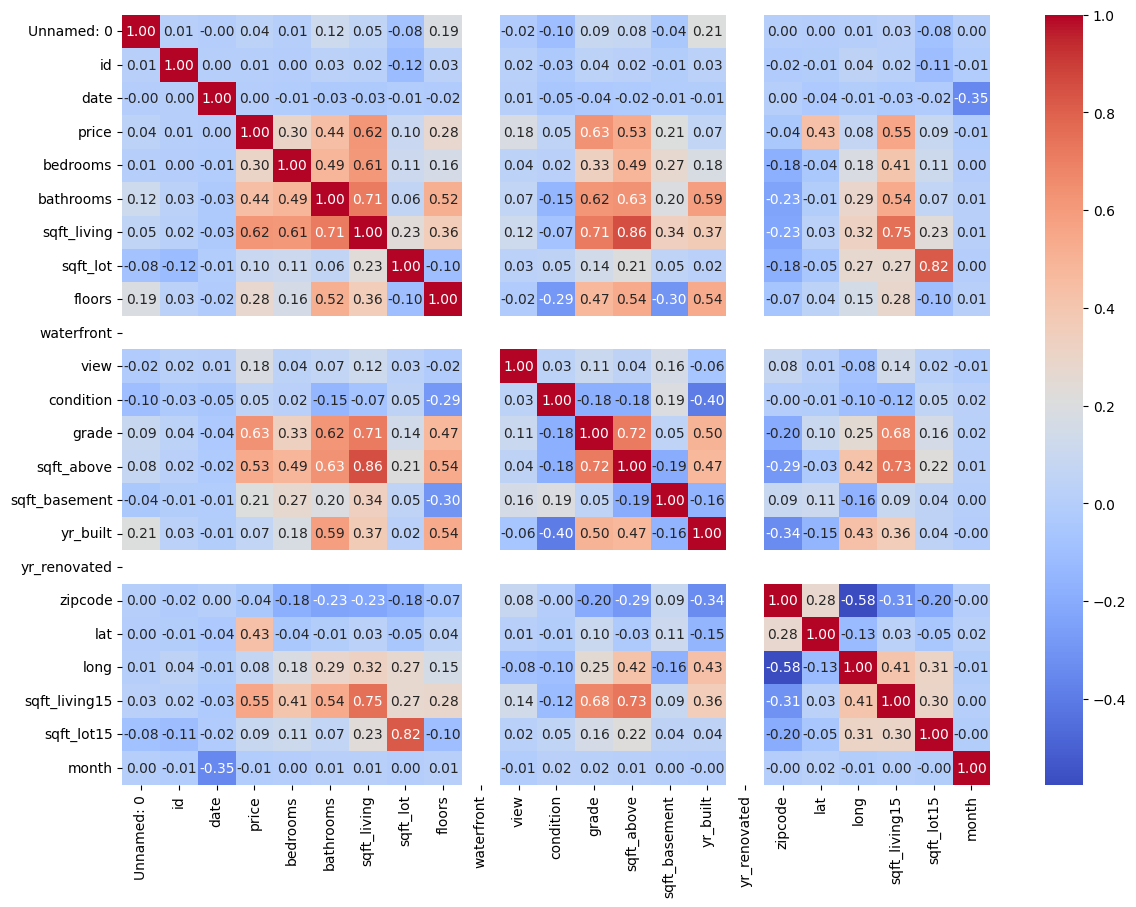

In [23]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

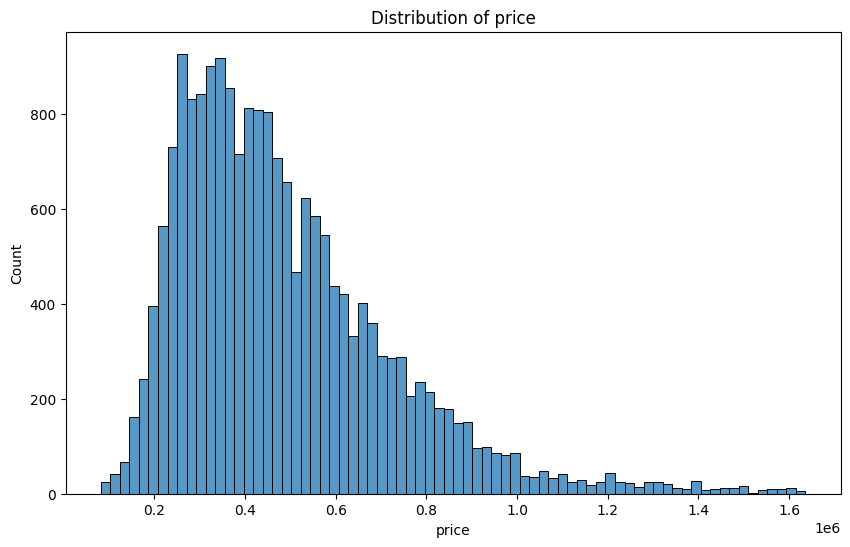

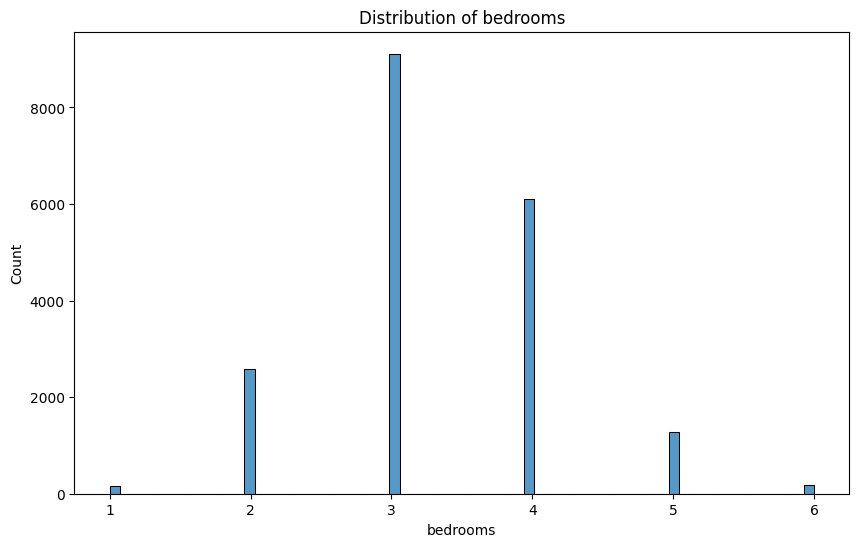

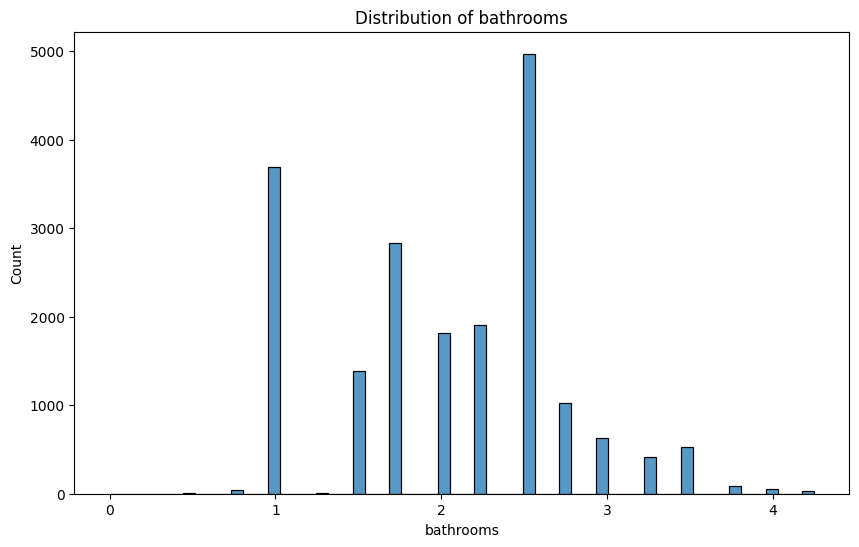

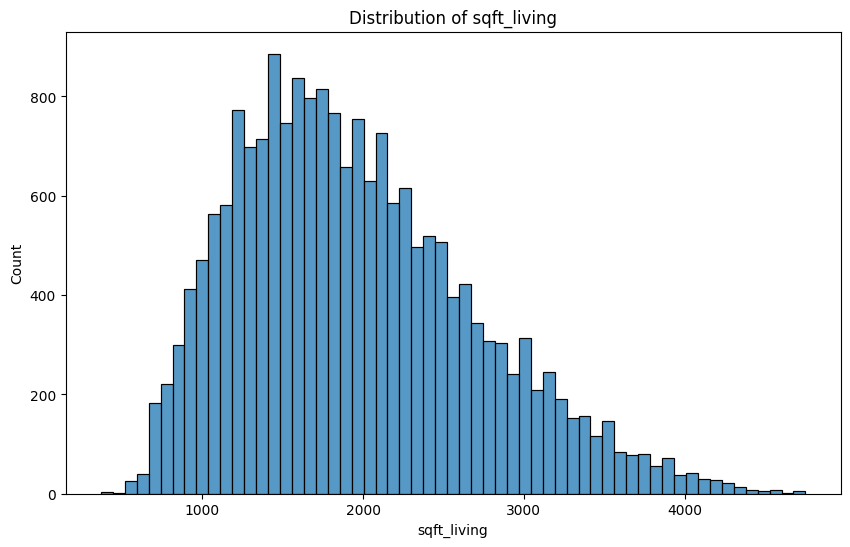

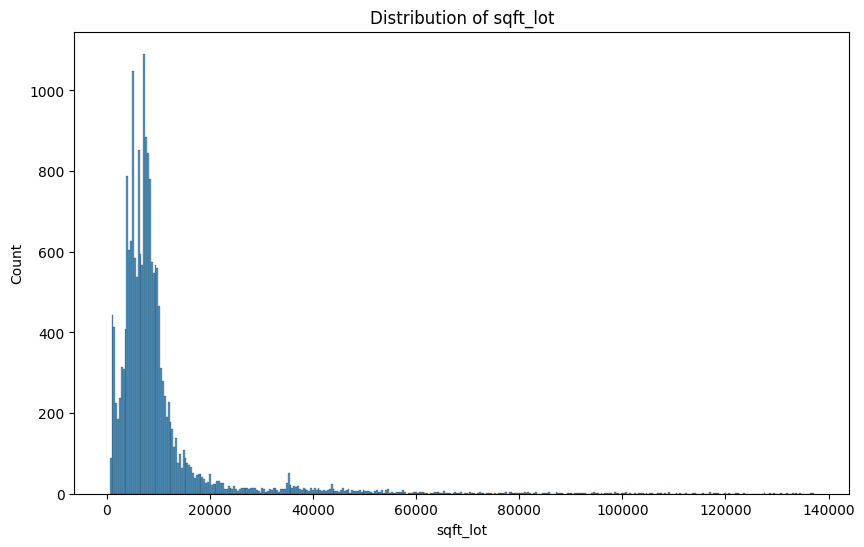

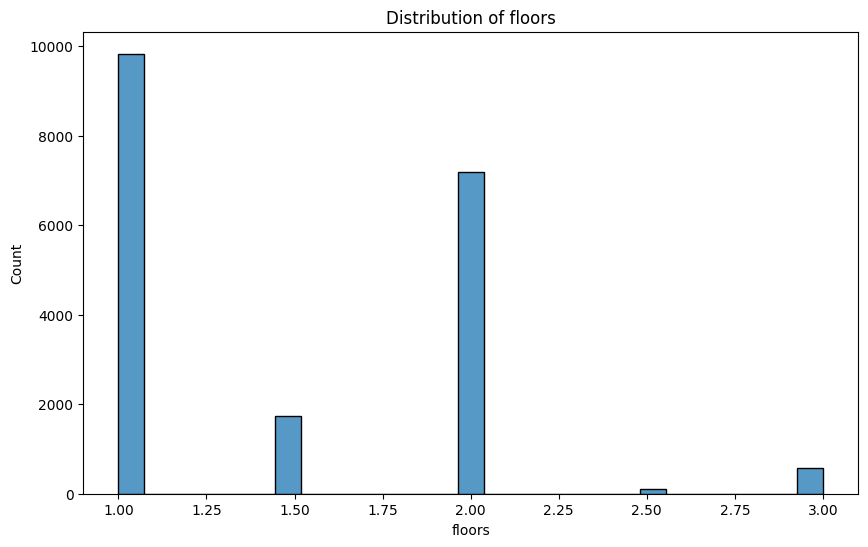

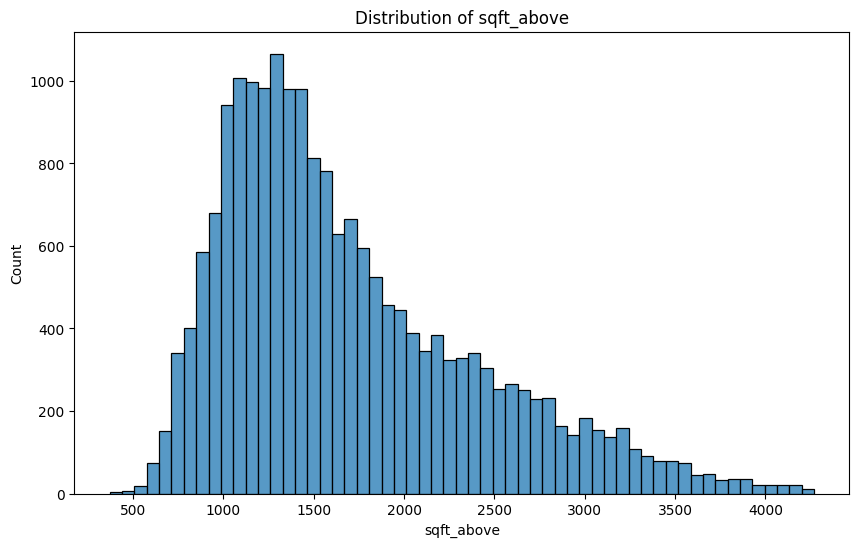

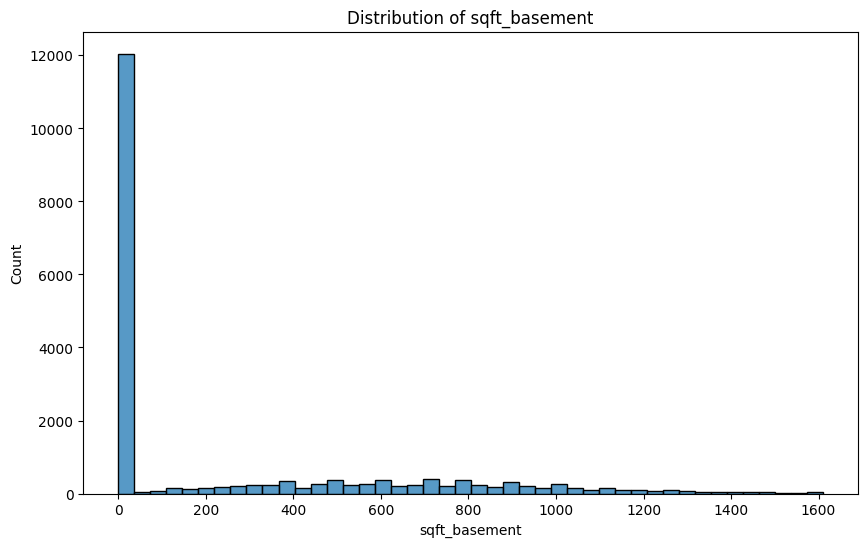

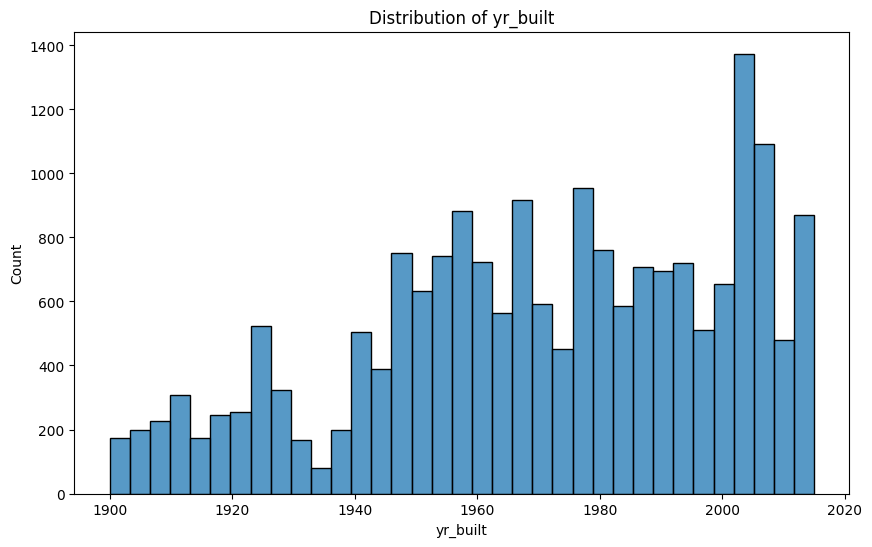

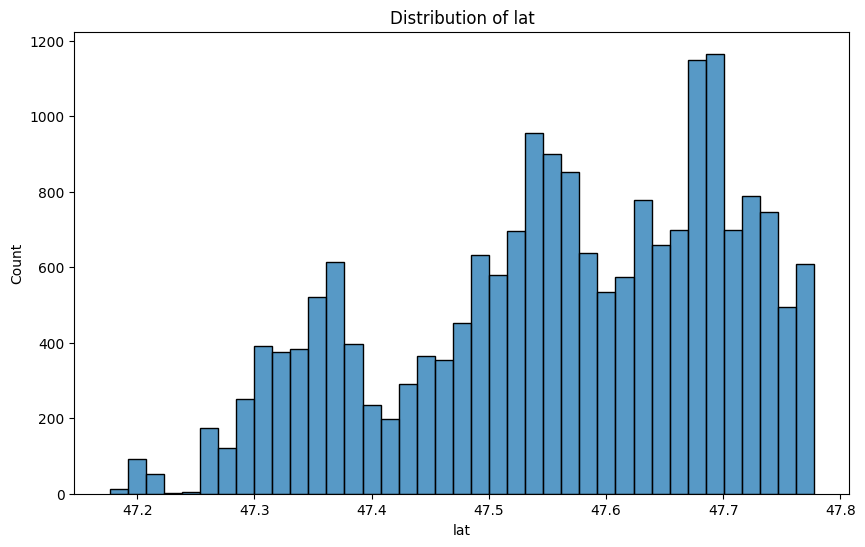

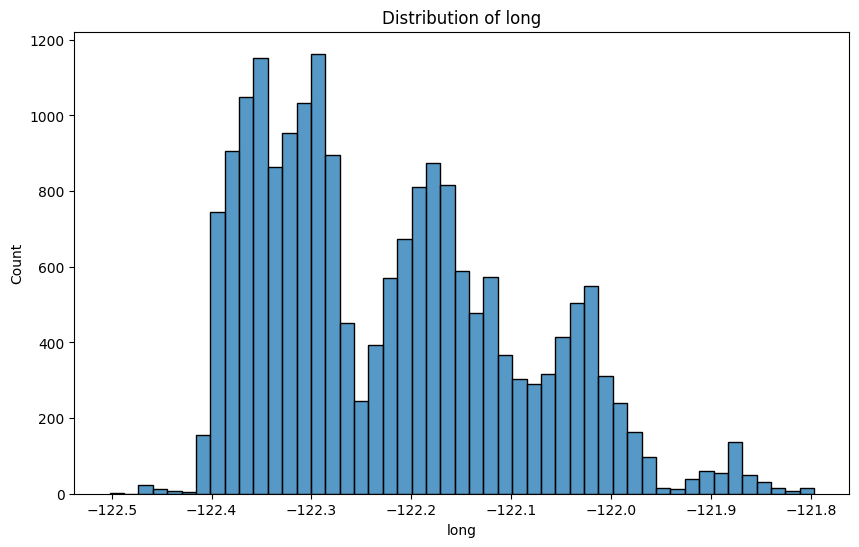

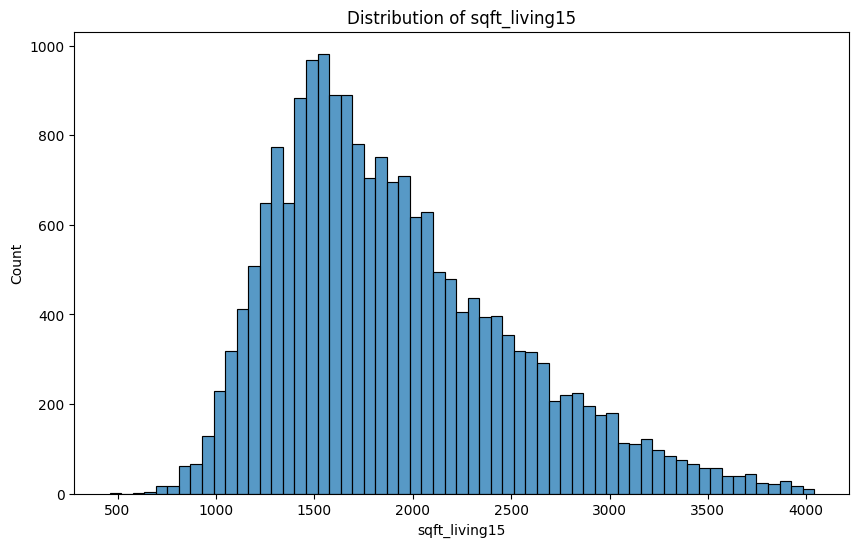

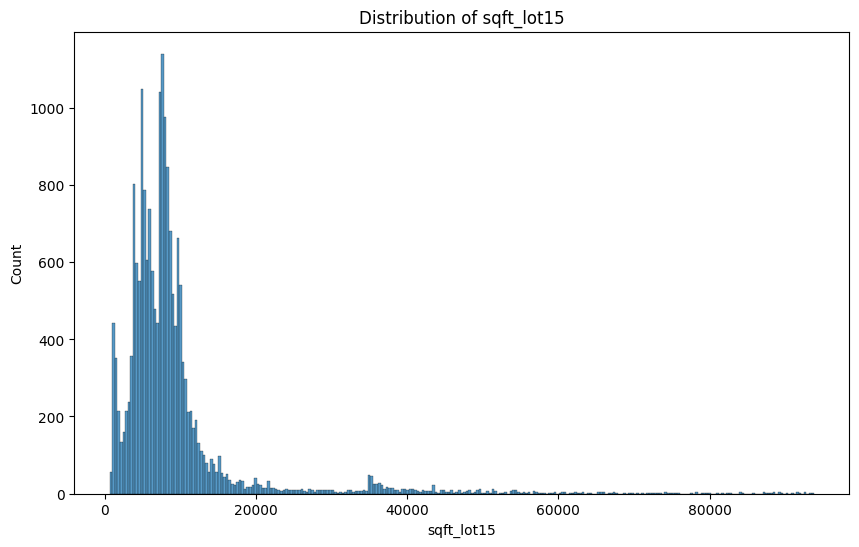

In [16]:
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 
                'sqft_living15', 'sqft_lot15']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()



**FOR ABOVE SEE IF YOU CAN SWITCH DATE FROM A MEASUREMENT FROM START DATE TO END DATE**

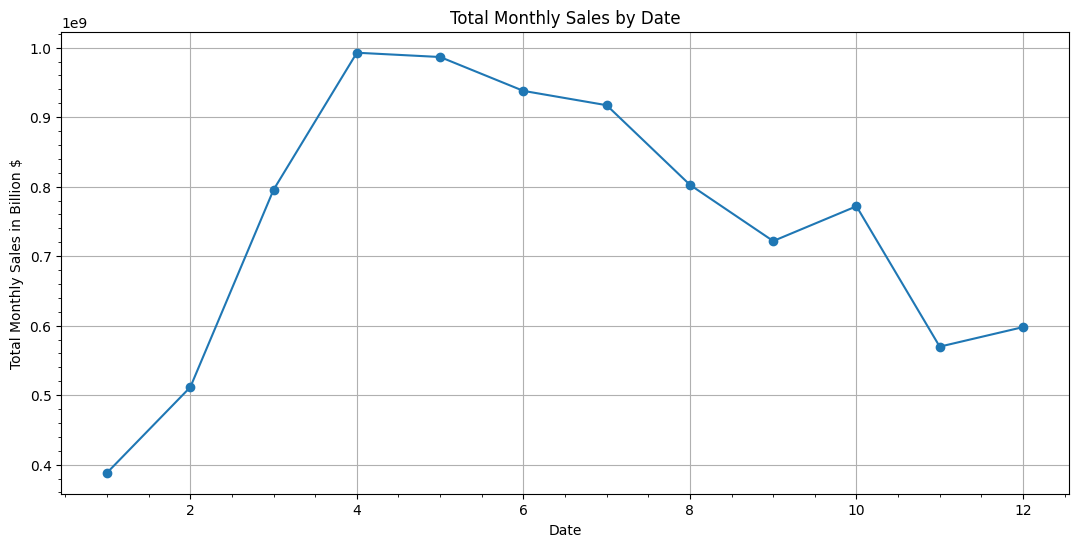

In [13]:
df_sales_by_month = df.groupby('month')['price'].sum().reset_index()

plt.figure(figsize=(13, 6))
plt.plot(df_sales_by_month['month'], df_sales_by_month['price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales in Billion $')
plt.title('Total Monthly Sales by Date')
plt.grid(True)
plt.minorticks_on()
plt.show()



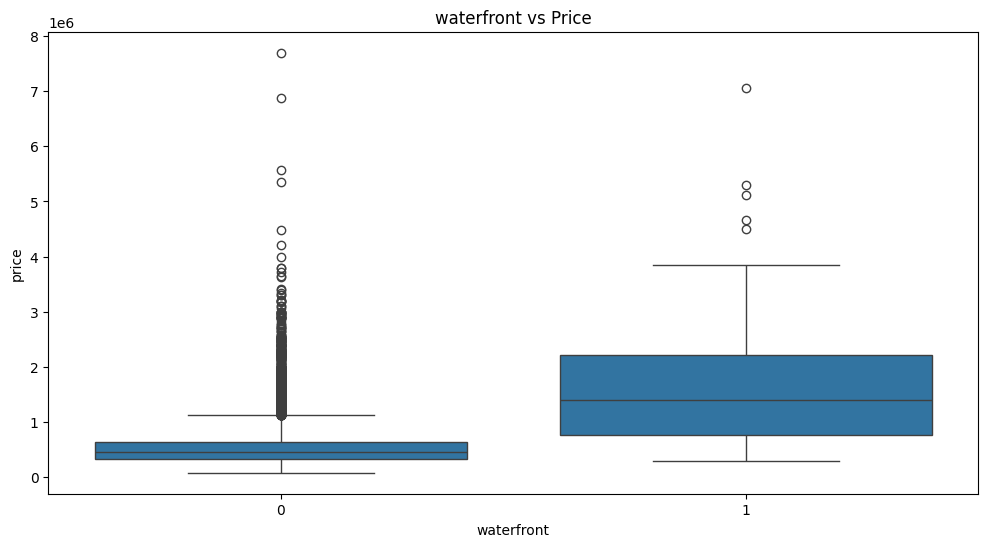

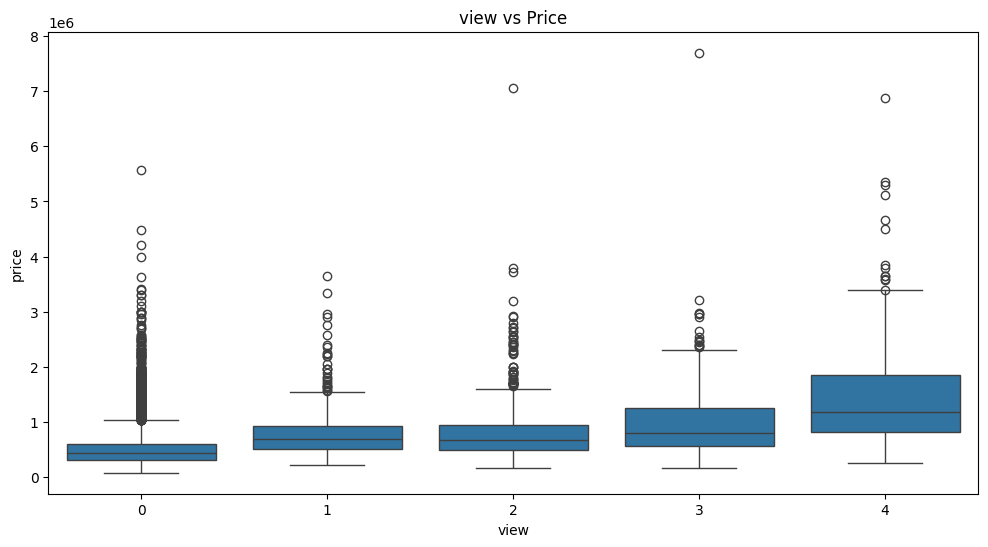

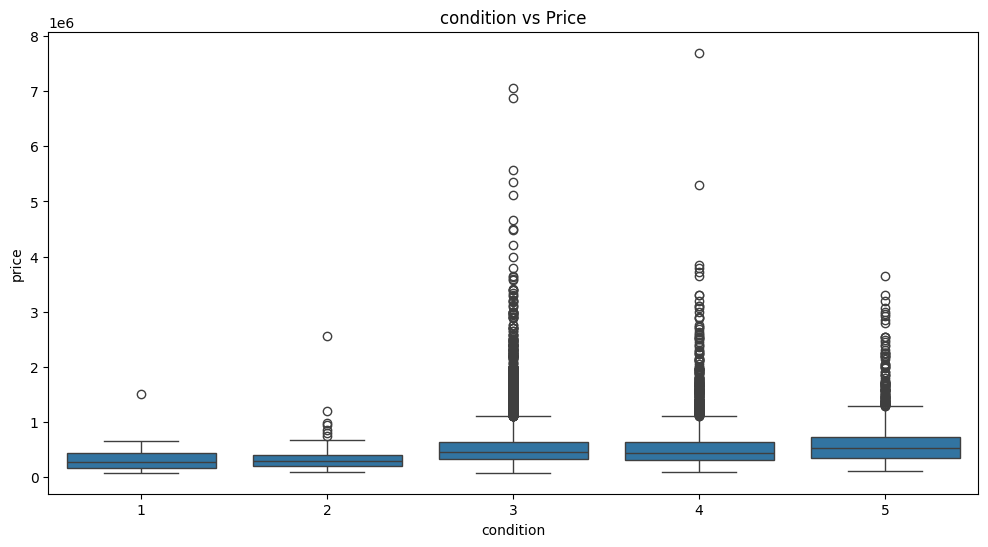

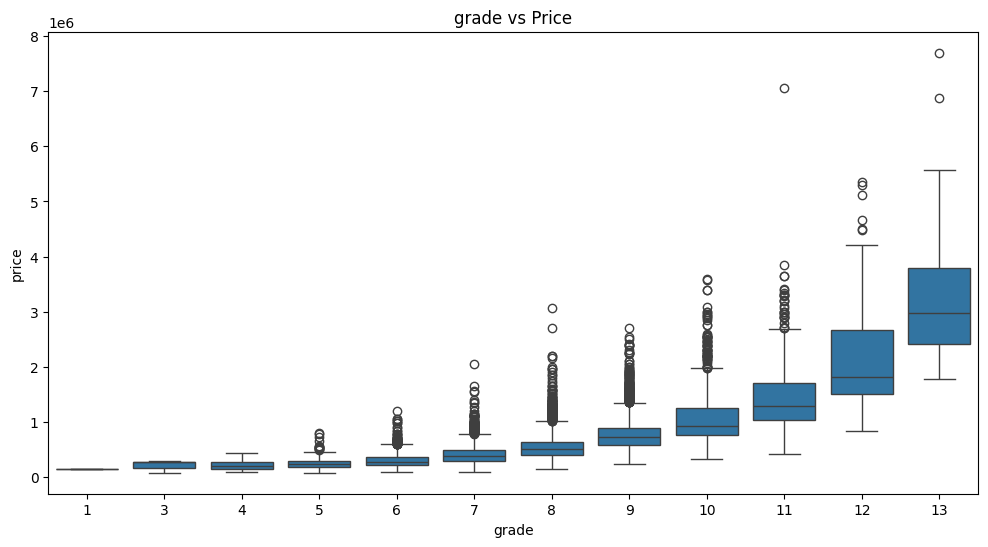

In [6]:
categorical_cols = ['waterfront', 'view', 'condition', 'grade']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.show()


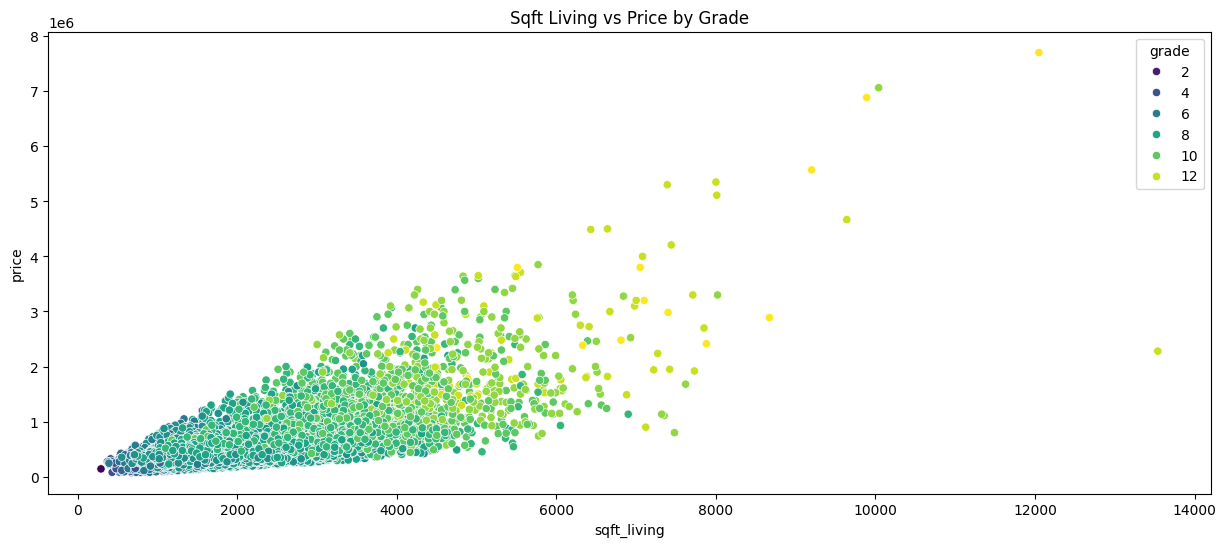

In [7]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='sqft_living', y='price', hue='grade', palette='viridis', data=df)
plt.title('Sqft Living vs Price by Grade')
plt.show()




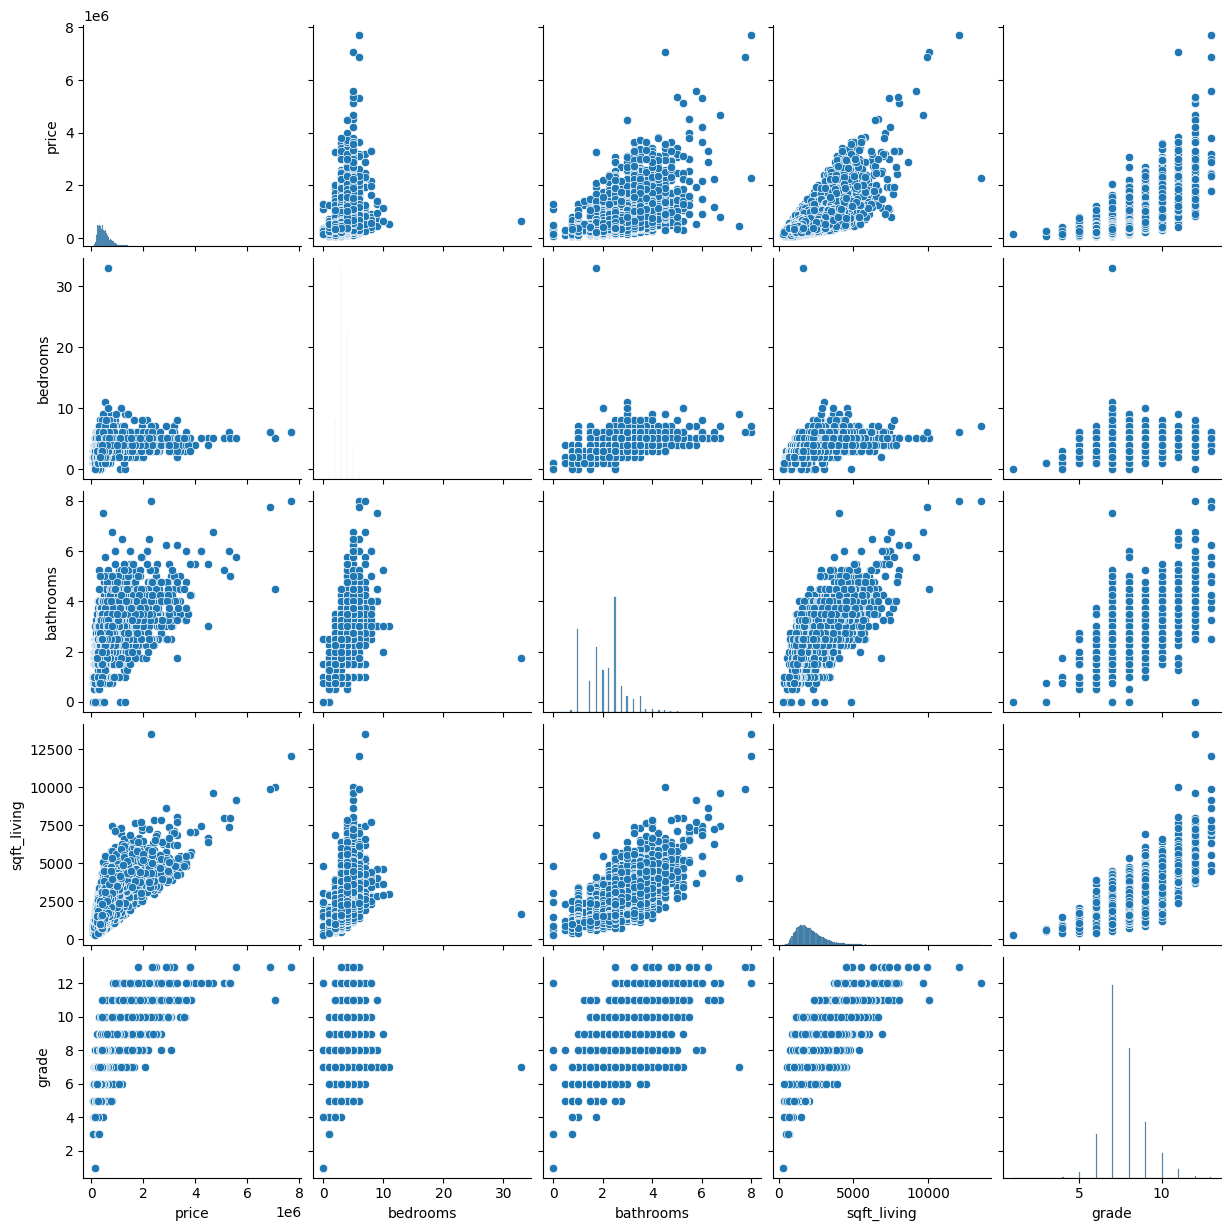

In [8]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])
plt.show()


/tmp/ipykernel_5956/2073489943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10


Text(0, 0.5, 'Average Price in Million $')

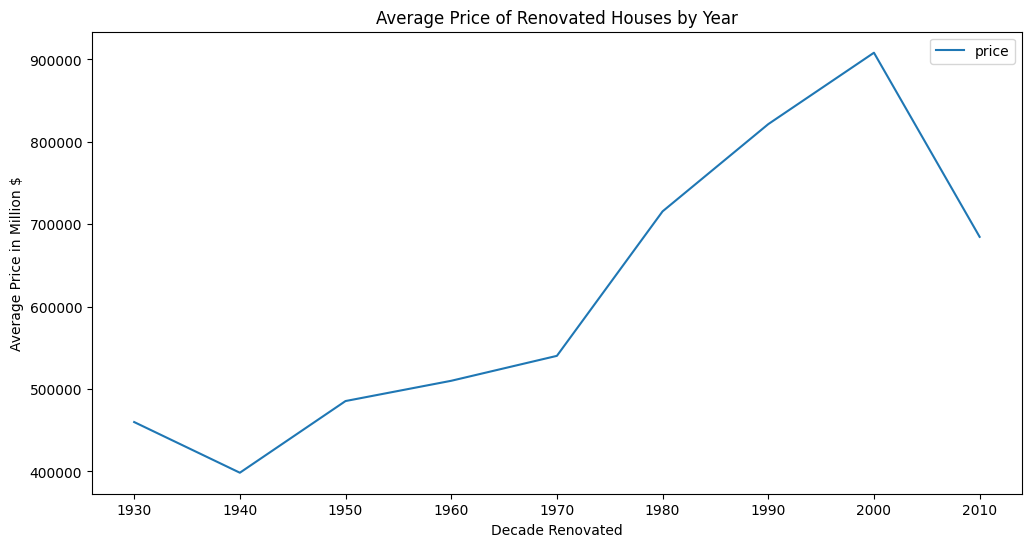

In [7]:
df_renovated = df[df['yr_renovated'] > 0] 
df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10
df_renovated_vs_price = df_renovated.groupby('decade')['price'].mean().reset_index()
df_renovated_vs_price.plot(x='decade', y='price', figsize=(12, 6))
plt.title('Average Price of Renovated Houses by Year')
plt.xlabel('Decade Renovated')
plt.ylabel('Average Price in Million $')
